<a href="https://colab.research.google.com/github/NataliaEde/Project_4_-Twitter_Sentiment_US_Airways/blob/main/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling - US Airlines 



* Student name: Natalia Edelson
* Student pace: Flex
* Scheduled project review date/time: April 19, 2023
* Instructor name: Morgan Jones
* Blog: https://medium.com/@nataliagoncharov/analyzing-customer-sentiment-for-major-us-airlines-on-twitter-6656d23b1800


In [ ]:
!pip install -q scikit-learn==1.1.3
!pip install -q pyLDAvis==2.1.2

In [ ]:
import pandas as pd
import os
from tqdm.notebook import tqdm
tqdm.pandas()
import re
import spacy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from spacy.language import Language
from spacy import displacy
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import warnings
warnings.filterwarnings('ignore')

The LDA(Latent Dirichlet Allocation) model is an unsupervised machine learning technique used to identify the topics in a corpus. It achieves this by assigning a distribution of topics and then words to each topic. Specifically, each topic is a probability distribution over words.

The coherence score is a measure of how well the topics generated by the LDA model are meaningful and interpretable. A higher coherence score indicates better topic coherence and a higher degree of similarity between the words in a topic. The coherence score is calculated using the u_mass matrix, which is based on the co-occurrence of words within the corpus.

The function finds the optimal number of topics based on the highest coherence score, which is calculated using the co-occurrence of words within the corpus.



In [ ]:
# Retrieving data to perform topic modeling 
data = pd.read_csv('topic.csv')

In [ ]:
# Only including the cleaned without stem column
data = data['clean_tweet_wt_stem'].loc[data['sentiment'] == 0]

In [ ]:
# Dropping all hte null values 
data.dropna(inplace=True)

In [ ]:
data

0         increase legroom airlines compare via cnnmoney
1      third straight time flight delayed flying guys...
2       sure happened usairways status merger took place
3      probably least satisfactory airline ever never...
4      wait 2 hrs cs call back flt cxld protection am...
                             ...                        
571    son passenger flight 3710 chicago toronto plan...
572                                  inadequate accident
573    brothers baggage lost route 2015 panamerican c...
574      different airport way getting different airport
575    cancelled flightled none passengers notified c...
Name: clean_tweet_wt_stem, Length: 576, dtype: object

The bellow function performs topic modeling on a list of tweets using Latent Dirichlet Allocation (LDA) and selects the optimal number of topics based on coherence scores.

  0%|          | 0/576 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

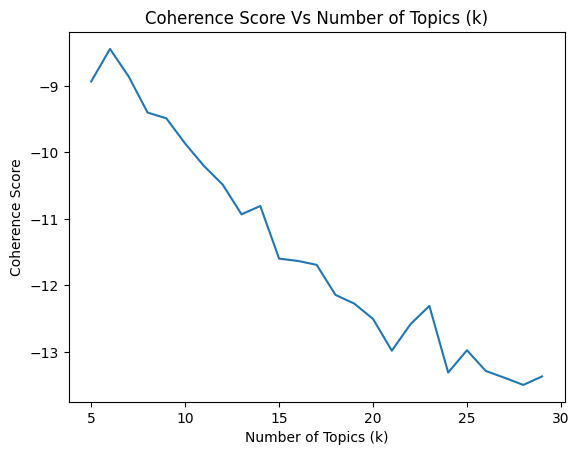

No of Topic Selected by Coherence Score: 6


In [ ]:
docs = [] # Initializing list
for tweet in tqdm(data): # loop through tweets 
    docs.append(tweet)  # add to the list

# Merge the words into a single string 
vocab_size = len(set(" ".join(docs).split(" ")))

# Converting into tokens
tokens = [text.split() for text in docs]

# Storing using class to map words to integers ids
id2word = Dictionary(tokens)

# Storing into corpus using method to generate 
# no. of times word appears
corpus = [id2word.doc2bow(text) for text in tokens]

#Setting up LDA model

coh = []
for i in tqdm(range(5,30)):
    model = LdaModel(corpus, i, id2word,random_state=42)
    cm = CoherenceModel(model=model, corpus=corpus, 
                        coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value
    coh.append(coherence)

# Setting up ploting details 
plt.plot(range(5,30),coh)
plt.title('Coherence Score Vs Number of Topics (k)')
plt.xlabel('Number of Topics (k)')
plt.ylabel('Coherence Score')
plt.show()

# calculating for different numbers of topics
# 'np.array(coh).argmax()' finds the index of the maximum coherence score
# '+ 5' is added to the index, assuming the number of topics started from 5


k_topic = np.array(coh).argmax() + 5

print('No of Topic Selected by Coherence Score:',k_topic)

In [ ]:
# Creating a TfidfVectorizer object with vocab_size features, 
# 0.95 max document frequency, and English stop words

tfidf_featurizer = TfidfVectorizer(max_features=vocab_size, 
                                       max_df=0.95, stop_words='english')

# Transforming the list of documents into a matrix of numerical features 
# using TfidfVectorizer fit_transform method
docs_tfidf = tfidf_featurizer.fit_transform(docs) 

In [ ]:
import pyLDAvis.sklearn

In [ ]:
pyLDAvis.enable_notebook() # To enable the visualization on the notebook

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Creating an LDA_model object with k_topic topics and a random state of 42
LDA_model = LatentDirichletAllocation(n_components=k_topic, random_state=42)

# Fitting the TF-IDF matrix (docs_tfidf) to the LDA model
LDA_model.fit(docs_tfidf)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=6, random_state=42)

In [ ]:
 # Creating a visualization panel for the LDA model using pyLDAvis
panel = pyLDAvis.sklearn.prepare(LDA_model, docs_tfidf, tfidf_featurizer)
panel

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.053464 -0.031210       1        1  18.096917
0      0.047904 -0.044064       2        1  17.596903
1      0.005686  0.032542       3        1  16.947530
4     -0.009406  0.020249       4        1  16.040339
2      0.016706  0.025470       5        1  15.953288
5     -0.007425 -0.002987       6        1  15.365023, topic_info=          Term      Freq     Total Category  logprob  loglift
915       hung  3.000000  3.000000  Default  30.0000  30.0000
753   flighted  2.000000  2.000000  Default  29.0000  29.0000
289        bad  2.000000  2.000000  Default  28.0000  28.0000
367     called  1.000000  1.000000  Default  27.0000  27.0000
1181     money  2.000000  2.000000  Default  26.0000  26.0000
...        ...       ...       ...      ...      ...      ...
528   customer  0.562582  4.265676   Topic6  -6.0826  -0.1527
1869   waiting  0.556523  4.219396   Topic6  -6.0934  -0.1527
1547   service  0.537780  5.180367   Topic6  -6.1277  -0.3921
1882   weather  0.513627  2.886806   Topic6  -6.1736   0.1467
887       hold  0.514785  4.638465   Topic6  -6.1714  -0.3253

[388 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
156       1  0.843179       able
163       1  0.991101    abysmal
189       3  0.409810      agent
189       6  0.409810      agent
190       5  0.603876     agents
...     ...       ...        ...
1889      6  0.796862      weeks
1912      1  0.531962       work
1918      2  0.528562      worst
1918      3  0.528562      worst
1938      3  0.660260  yesterday

[247 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 5, 3, 6])

In [ ]:
pyLDAvis.save_html(panel, 'lda.html')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import files
files.download('lda.html')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Conclusion:

Based on the top keywords generated from the negative topic, it seems that the topic is related to complaints or negative feedback regarding flights. The top keywords "flighted", "bad", "called", "money", "need", "customer", "cancelled", "amp", "waiting", "person", "told", "change", "book", and "experience" suggest that customers are expressing frustration and dissatisfaction with airline travel due to a variety of issues, including flight cancellations, poor customer service, long wait times, and unhelpful staff.

This topic could represent a cluster of tweets that express negative sentiment or dissatisfaction with airline travel. It's important for airlines to monitor and address these types of complaints in order to improve the overall customer experience and reputation of their brand.